<a href="https://colab.research.google.com/github/reshmitha0424/Diabetes-Risk--Predicting-Outcomes/blob/main/Airline_Delay_Patterns_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
airline_data = pd.read_excel("/content/Table 1A - Reporting Operating Carrier Summary of Airline On-Time Performance from 1995 Year-to-date June 2025.xlsx",
                   sheet_name="thruJun25", skiprows=2)
airline_data.head()

,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted,Unnamed: 11
0,1995,2673586.0,525319.0,406319.0,49625.0,5323.0,78.30,19.65,15.20,1.86,0.20,NaN
1,1996,2645299.0,605638.0,489247.0,73694.0,7221.0,74.05,22.89,18.49,2.79,0.27,NaN
2,1997,2691157.0,563325.0,443134.0,54120.0,6340.0,76.82,20.93,16.47,2.01,0.24,NaN
3,1998,2662900.0,580417.0,462061.0,63426.0,7173.0,75.55,21.80,17.35,2.38,0.27,NaN
4,1999,2710849.0,595845.0,481614.0,86941.0,7722.0,74.53,21.98,17.77,3.21,0.28,NaN


In [ ]:
airline_data.columns

Index(['Year', 'Operations', 'Late Arrivals', 'Late Departures', 'Cancelled',
       'Diverted', 'Percent On-Time Arrivals', 'Percent Late Arrivals',
       'Percent Late Departures', 'Percent Cancelled', 'Percent Diverted',
       'Unnamed: 11'],
      dtype='object')

Unnamed:11 column has almost all NaNs. We can drop the column

In [ ]:
airline_data = airline_data.drop(columns=["Unnamed: 11"])
airline_data

,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted
0,1995,2673586.0,525319.0,406319.0,49625.0,5323.0,78.30,19.65,15.20,1.86,0.20
1,1996,2645299.0,605638.0,489247.0,73694.0,7221.0,74.05,22.89,18.49,2.79,0.27
2,1997,2691157.0,563325.0,443134.0,54120.0,6340.0,76.82,20.93,16.47,2.01,0.24
3,1998,2662900.0,580417.0,462061.0,63426.0,7173.0,75.55,21.80,17.35,2.38,0.27
4,1999,2710849.0,595845.0,481614.0,86941.0,7722.0,74.53,21.98,17.77,3.21,0.28
5,2000,2811192.0,638726.0,526156.0,96727.0,7372.0,73.58,22.72,18.72,3.44,0.26
6,2001,3103240.0,627632.0,529152.0,91590.0,6741.0,76.61,20.23,17.05,2.95,0.22
7,2002,2620287.0,451327.0,368323.0,34278.0,3963.0,81.32,17.22,14.06,1.31,0.15
8,2003,3209238.0,493274.0,391521.0,52704.0,5357.0,82.82,15.37,12.20,1.64,0.17
9,2004,3505494.0,710283.0,574557.0,58357.0,6650.0,77.88,20.26,16.39,1.66,0.19


In [ ]:
# Keep only rows where Year is a number (filter out text rows)
airline_data = airline_data[pd.to_numeric(airline_data["Year"], errors="coerce").notna()]

# Convert Year to int
airline_data["Year"] = airline_data["Year"].astype(int)

# Reset index
airline_data = airline_data.reset_index(drop=True)

# Verify
airline_data


,Year,Operations,Late Arrivals,Late Departures,Cancelled,Diverted,Percent On-Time Arrivals,Percent Late Arrivals,Percent Late Departures,Percent Cancelled,Percent Diverted
0,1995,2673586.0,525319.0,406319.0,49625.0,5323.0,78.30,19.65,15.20,1.86,0.20
1,1996,2645299.0,605638.0,489247.0,73694.0,7221.0,74.05,22.89,18.49,2.79,0.27
2,1997,2691157.0,563325.0,443134.0,54120.0,6340.0,76.82,20.93,16.47,2.01,0.24
3,1998,2662900.0,580417.0,462061.0,63426.0,7173.0,75.55,21.80,17.35,2.38,0.27
4,1999,2710849.0,595845.0,481614.0,86941.0,7722.0,74.53,21.98,17.77,3.21,0.28
5,2000,2811192.0,638726.0,526156.0,96727.0,7372.0,73.58,22.72,18.72,3.44,0.26
6,2001,3103240.0,627632.0,529152.0,91590.0,6741.0,76.61,20.23,17.05,2.95,0.22
7,2002,2620287.0,451327.0,368323.0,34278.0,3963.0,81.32,17.22,14.06,1.31,0.15
8,2003,3209238.0,493274.0,391521.0,52704.0,5357.0,82.82,15.37,12.20,1.64,0.17
9,2004,3505494.0,710283.0,574557.0,58357.0,6650.0,77.88,20.26,16.39,1.66,0.19


pd.to_numeric(..., errors="coerce") converts non-numeric “SOURCE” and “NOTES” to NaN,

.notna() keeps only true year rows (1995–2025).

In [ ]:
# Optional: rename columns for easier access
airline_data.columns = [col.strip().replace(" ", "_") for col in airline_data.columns]
airline_data.head(3)

,Year,Operations,Late_Arrivals,Late_Departures,Cancelled,Diverted,Percent_On-Time_Arrivals,Percent_Late_Arrivals,Percent_Late_Departures,Percent_Cancelled,Percent_Diverted
0,1995,2673586.0,525319.0,406319.0,49625.0,5323.0,78.30,19.65,15.20,1.86,0.20
1,1996,2645299.0,605638.0,489247.0,73694.0,7221.0,74.05,22.89,18.49,2.79,0.27
2,1997,2691157.0,563325.0,443134.0,54120.0,6340.0,76.82,20.93,16.47,2.01,0.24


Plot of On-Time Arrivals Over Time

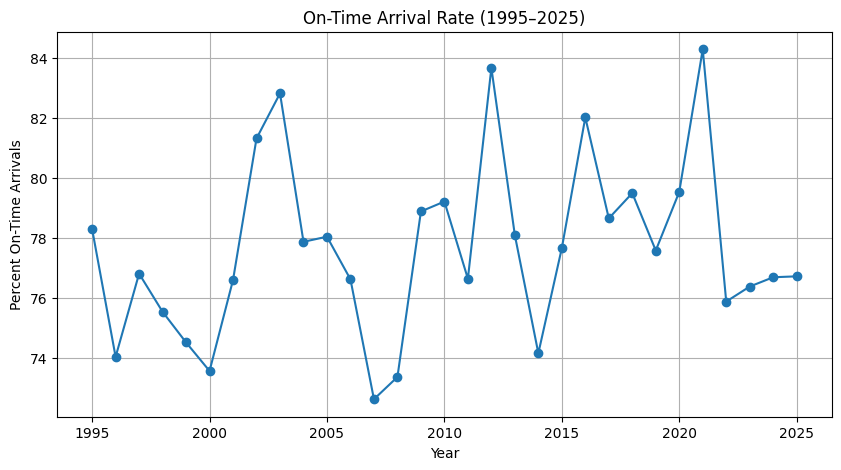

In [ ]:
x1 = airline_data["Year"]
y2 = airline_data["Percent_On-Time_Arrivals"]
plt.figure(figsize=(10,5))
plt.plot(x1, y1, marker='o')
plt.title("On-Time Arrival Rate (1995–2025)")
plt.xlabel("Year")
plt.ylabel("Percent On-Time Arrivals")
plt.grid(True)
plt.show()

- From 1995 to 2025, airline on-time arrival rates in the U.S. have fluctuated between roughly 73% and 84%, showing a generally stable but cyclical pattern.
- Performance declined in the late 1990s, improved sharply in the early 2000s following reduced traffic after 9/11, and then showed alternating peaks and dips over the next two decades.
- Notably, punctuality spiked during 2020–2021 when air traffic was lighter due to the pandemic but declined again as operations ramped back up.
- Overall, airlines have maintained moderate reliability, though recent years suggest ongoing recovery toward pre-pandemic efficiency levels.


Comparing Late Departures & Cancellations

They represent two possible failure outcomes in flight schedules:

- A delay (flight still happens, but late), or

- A cancellation (flight doesn’t happen at all).

Looking at them together helps us understand how airlines manage disruptions — do they prefer delaying flights or cancelling them under pressure?

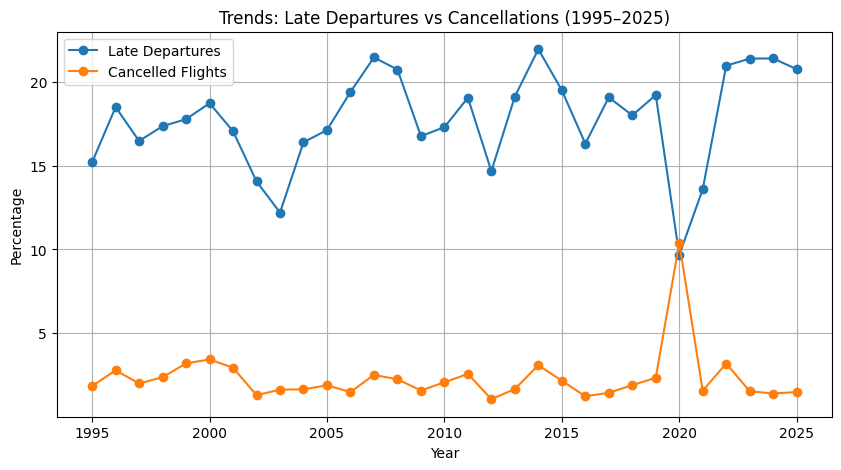

In [ ]:
x2 = airline_data["Year"]
y2_1 = airline_data["Percent_Late_Departures"]
y2_2 = airline_data["Percent_Cancelled"]

plt.figure(figsize=(10,5))
plt.plot(x2, y2_1, marker='o', label="Late Departures")
plt.plot(x2, y2_2, marker='o', label="Cancelled Flights")
plt.title("Trends: Late Departures vs Cancellations (1995–2025)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.grid(True)
plt.show()


- Across three decades, late departures consistently range between 15–22%, making them a far more common disruption than cancellations.

- The general trend shows mild fluctuations, with peaks around 2007, 2011, and 2018, suggesting cyclical congestion and operational inefficiencies.
- In contrast, cancellations remain below 3% for most years, except a sharp spike in 2020, when pandemic restrictions and reduced staffing grounded large portions of flights.
- After 2021, both metrics stabilized — cancellations quickly dropped back to normal, while late departures rose again above 20%, indicating airlines restored capacity faster than they restored punctuality.